In [81]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


In [82]:
# Importing the Churn_Dataset
churn_df = pd.read_csv("telecom_churn_clean.csv")


In [83]:
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [84]:
churn_df.columns

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [85]:
# checking for missing values
churn_df.isna().sum().sort_values()

,0
Unnamed: 0,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


In [86]:
y.value_counts(normalize=True)


,proportion
churn,
0,0.855086
1,0.144914


In [87]:
# Checking the churn column
churn_df['churn'].value_counts(normalize = True)

,proportion
churn,
0,0.855086
1,0.144914


In [88]:
# Creating Features and Target Variables
X = churn_df.drop(['Unnamed: 0','churn'], axis=1)
y = churn_df['churn']

# spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [89]:
# Instantiating the Logistic Regression Model
log_reg = LogisticRegression(max_iter = 1000, class_weight= 'balanced')


In [90]:
# Fit the model to the training sets
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [91]:
# Prediciting the labels of the test data
y_pred = log_reg.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 1 1 0 

In [92]:
# Predicitng Probabilities
y_pred_probs = log_reg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.44972315023838033


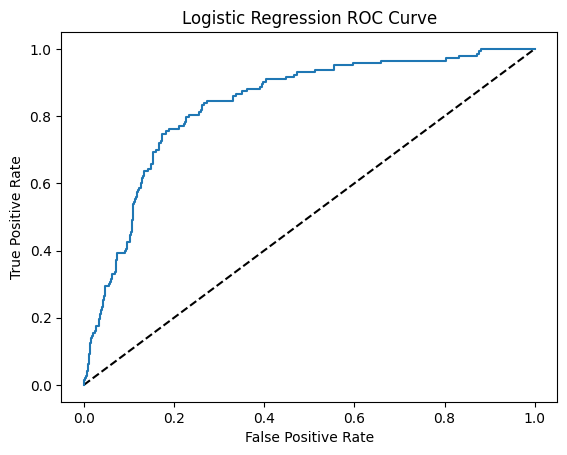

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [94]:
print(roc_auc_score(y_test, y_pred_probs))

0.8353909800817619


In [95]:
# Using Claasification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       857
           1       0.37      0.78      0.50       143

    accuracy                           0.78      1000
   macro avg       0.66      0.78      0.68      1000
weighted avg       0.87      0.78      0.80      1000

